In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [93]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [94]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df.shape

(10000, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [97]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [98]:
df.duplicated().sum()

0

In [99]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [100]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [101]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [102]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [103]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True,dtype=int)

In [104]:
X=df.drop(columns=['Exited'])
y=df['Exited']

In [105]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [106]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [107]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [108]:
X_train.shape

(8000, 11)

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
scaler=StandardScaler()

In [111]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [112]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [113]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [114]:
model=Sequential() #model have three layers--> input layers,hidden layers,output layers

In [115]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [116]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [117]:
#now we have to compile our model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [118]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2) #epochs determine how many time i take round on my data

Epoch 1/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5277 - accuracy: 0.7948 - val_loss: 0.4843 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4566 - accuracy: 0.7977 - val_loss: 0.4483 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8045 - val_loss: 0.4319 - val_accuracy: 0.8050
Epoch 4/50
200/200 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.8163 - val_loss: 0.4154 - val_accuracy: 0.8144
Epoch 5/50
200/200 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8350 - val_loss: 0.3979 - val_accuracy: 0.8263
Epoch 6/50
200/200 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8416 - val_loss: 0.3812 - val_accuracy: 0.8350
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8459 - val_loss: 0.3690 - val_accuracy: 0.8438
Epoch 

In [119]:
model.layers[0].get_weights()

[array([[ 1.15521550e-01,  2.53769964e-01,  2.14978099e-01,
         -9.71445665e-02,  6.12446573e-03, -7.75841475e-02,
         -3.99931967e-02,  7.97858387e-02, -4.11590666e-01,
          3.07699014e-02, -6.03890338e-04],
        [-6.19384587e-01,  7.79041573e-02, -7.84111097e-02,
          9.30529237e-01,  3.30253035e-01,  4.77600843e-01,
         -9.27091002e-01,  9.21544656e-02, -2.61775762e-01,
          7.55506635e-01, -3.08622718e-01],
        [-2.09953878e-02, -2.42283389e-01, -4.29458767e-02,
          9.57235321e-02,  1.59475412e-02,  3.03088933e-01,
         -6.90775663e-02,  1.28371883e-02,  4.32088971e-02,
          1.16986342e-01, -9.44436528e-03],
        [ 4.49528545e-01, -6.00359142e-02, -4.86527562e-01,
         -3.63875180e-01,  4.01776701e-01, -9.90148306e-01,
         -4.10365909e-01, -1.13121510e-01,  2.14255929e-01,
          1.30664068e-03, -1.73194274e-01],
        [-3.83053213e-01, -9.00376558e-01,  1.53451234e-01,
         -8.33549559e-01,  1.05722964e+00,  

In [120]:
y_log=model.predict(X_test_scaled) #output is a probability so we have to deceide a thresold

63/63 [==============================] - 0s 1ms/step


In [121]:
y_pred=np.where(y_log>0.5,1,0)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.865

In [123]:
import matplotlib.pyplot as plt


In [124]:
history.history

{'loss': [0.5276917815208435,
  0.4565926492214203,
  0.43243443965911865,
  0.4175061285495758,
  0.4030769467353821,
  0.3881807327270508,
  0.37513476610183716,
  0.36604297161102295,
  0.3592231273651123,
  0.3545229732990265,
  0.3513767719268799,
  0.3488795757293701,
  0.3470272123813629,
  0.3451588749885559,
  0.3438187539577484,
  0.34279102087020874,
  0.3414642810821533,
  0.3404003977775574,
  0.3397056460380554,
  0.33865058422088623,
  0.3385033905506134,
  0.3370301127433777,
  0.3368857502937317,
  0.33602485060691833,
  0.33567455410957336,
  0.3351614773273468,
  0.334875226020813,
  0.3339976370334625,
  0.33344757556915283,
  0.3328908681869507,
  0.3325618505477905,
  0.33240440487861633,
  0.3319140672683716,
  0.3317962884902954,
  0.33083465695381165,
  0.33073270320892334,
  0.3306800127029419,
  0.3305221199989319,
  0.33013027906417847,
  0.33000850677490234,
  0.3293837606906891,
  0.32944270968437195,
  0.32879719138145447,
  0.3282937705516815,
  0.328143

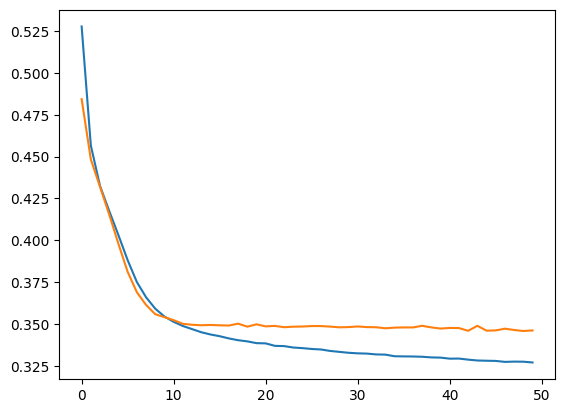

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

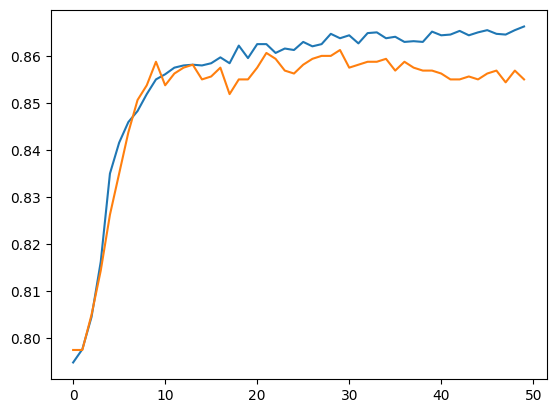

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])